<a href="https://colab.research.google.com/github/sameeruandme/Airbnb-NYC-Booking-Analysis-/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

#**IMPORTING LIBRARIES**

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


# Add all the imports in one cell
# Move settings like sns to another settings cell
# Other things looks good, if possible add trend graph (https://www.geeksforgeeks.org/plotting-a-trend-graph-in-python/), Trend graphs are more catchy than bar graph. question no 2 is best example.
# Increase size of pie chart
# Baki looks good

# **Data import**

In [ ]:
# Read CSV File from Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project/Airbnb NYC 2019.csv')

In [ ]:
df.head(10)
# Print head only, it eats up notebook memory and visal space

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#**Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**There are so many null values but we can't change in the reviews_per_month column and last_review column, so we can give the changes in the name column and host_name so we replace there null value by Absent.**

In [ ]:
# Filling Null values
df['name'].fillna('Absent', inplace = True)
df['host_name'].fillna('Absent', inplace =  True)

In [ ]:
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**In the price column there are so many properties have price showing was 0, So we can replace that value by the median price of there room types so we can easily replace the value.**

In [ ]:
df.loc[ (df.room_type=='Entire home/apt') & (df.price==0),'price']=df.loc[ (df.room_type=='Entire home/apt') & (df.price!=0),'price'].median()
df.loc[ (df.room_type=='Private room') & (df.price==0),'price']=df.loc[ (df.room_type=='Private room') & (df.price!=0),'price'].median()
df.loc[ (df.room_type=='Shared room') & (df.price==0),'price']=df.loc[ (df.room_type=='Shared room') & (df.price!=0),'price'].median()


**Now we take only necessary columns we don't need the Id column so we can drop that.**

In [ ]:
airbnb_df = df.drop(['id'], axis =1)
airbnb_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_df = df[['name', 'host_id','host_name', 'neighbourhood_group',
       'neighbourhood','latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

In [ ]:
airbnb_df.head(5)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.739094,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.146276,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#**Which date has most no. of Booking?**

In [ ]:
Most_booking_in_date = airbnb_df.groupby(['last_review'])['number_of_reviews'].count().reset_index().sort_values(by='number_of_reviews',ascending=False).head(10)
Most_booking_in_date

,last_review,number_of_reviews
1748,2019-06-23,1413
1756,2019-07-01,1359
1755,2019-06-30,1341
1749,2019-06-24,875
1762,2019-07-07,718
1757,2019-07-02,658
1747,2019-06-22,655
1741,2019-06-16,601
1760,2019-07-05,580
1761,2019-07-06,565


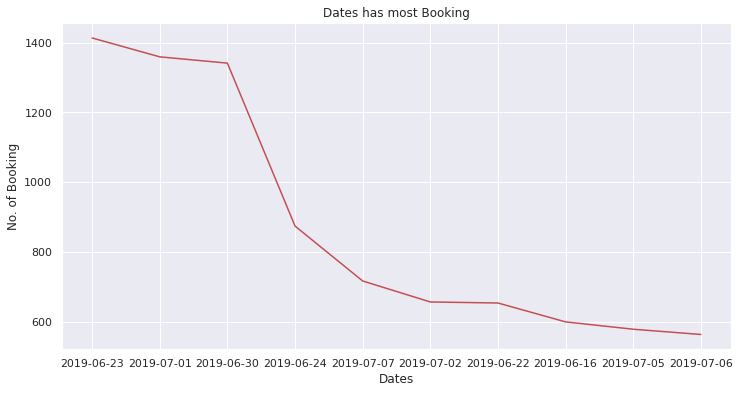

In [ ]:
#Graph For Date have most Booking
x = Most_booking_in_date['last_review']
y = Most_booking_in_date['number_of_reviews']
figsize =  plt.figure(figsize= (12,6))
plt.plot(x, y , color = 'r')
plt.xlabel("Dates")  # add X-axis label
plt.ylabel("No. of Booking")  # add Y-axis label
plt.title("Dates has most Booking")  # add title
plt.show()

**In Airbnb data set from 2019 June last two weeks to 2019 July first two weeks are most no. of booking company had. 2019-06-23 has 1413 no. of Booking it is most busiest day.**

#**Which host has most no. of booking?**

In [ ]:
busy_host = airbnb_df.groupby(['host_name','neighbourhood_group'])['reviews_per_month'].count().reset_index().sort_values(by='reviews_per_month',ascending=False).head(10)
busy_host

,host_name,neighbourhood_group,reviews_per_month
13221,Sonder (NYC),Manhattan,207
9746,Michael,Manhattan,176
3254,David,Manhattan,149
6812,John,Manhattan,127
9745,Michael,Brooklyn,127
3253,David,Brooklyn,115
436,Alex,Manhattan,110
9860,Mike,Manhattan,108
12502,Sarah,Brooklyn,105
435,Alex,Brooklyn,99


In [ ]:
busy_host = airbnb_df.groupby(['host_name','neighbourhood_group'])['minimum_nights'].count().reset_index().sort_values(by='minimum_nights',ascending=False).head(10)
busy_host

,host_name,neighbourhood_group,minimum_nights
13221,Sonder (NYC),Manhattan,327
1838,Blueground,Manhattan,230
9746,Michael,Manhattan,212
3254,David,Manhattan,202
9745,Michael,Brooklyn,159
6812,John,Manhattan,151
3253,David,Brooklyn,142
7279,Kara,Manhattan,135
9860,Mike,Manhattan,134
436,Alex,Manhattan,134


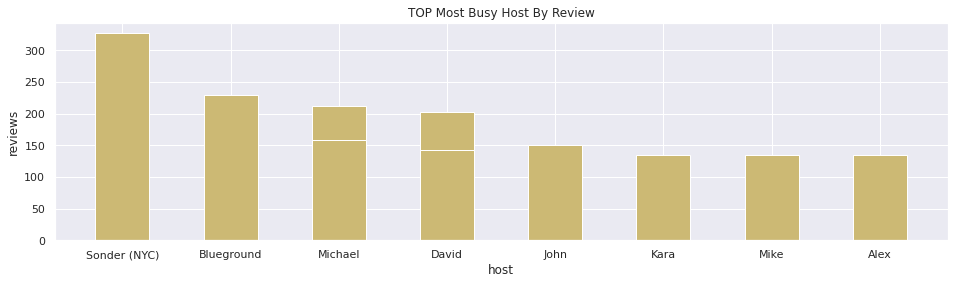

In [ ]:
#Most_Busiest_Host_By_Reviews
host = busy_host['host_name']
reviews = busy_host['minimum_nights']
fig = plt.figure(figsize = (16,4)) 
plt.bar(host,reviews,color = 'y',width=0.5)
plt.xlabel('host')
plt.ylabel('reviews')
plt.title('TOP Most Busy Host By Review')
plt.show()

**We can not decide busiest host only on reviews per month, we had to which host most no. of reviews, customer stay more time at hosts propertoes. As we can see that according to reviews_per_month and minimum_nights that host Sonder(NYC) is busiest host of the data set that we have, but we can't definietly say that Sonder(NYC) is the busiest host we just consider that he is the buiest host on the basis of reviews_per_month and Minimum_nights.**

In [ ]:
#most listed property
most_property =airbnb_df[airbnb_df['host_name']=='Sonder (NYC)']
most_property[['host_id','host_name','neighbourhood_group','neighbourhood','latitude','longitude','room_type']].head(6)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type
38293,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt
38294,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt
38588,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt
39769,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt
39770,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt
39771,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74845,-73.97446,Entire home/apt


**Host Sonder(NYC) is most busiest host in Manhattan Neighbourhood Group. We also noticed host has so many different properties we can take an exapmle of host Sonder(NYC).**

#**Which area is busiest neighbourhood?**

In [ ]:
#most_busy_area
Busiest_area = airbnb_df.groupby(['neighbourhood_group'])['number_of_reviews'].count().reset_index()
Busiest_area.sort_values(by= 'number_of_reviews')

,neighbourhood_group,number_of_reviews
4,Staten Island,373
0,Bronx,1091
3,Queens,5666
1,Brooklyn,20104
2,Manhattan,21661


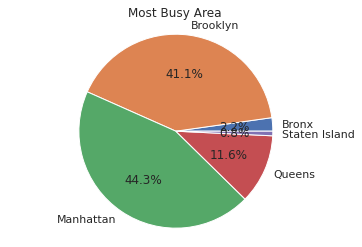

In [ ]:
#graph_for_most_busy_area
Room_Lables = Busiest_area['neighbourhood_group']
room_data = Busiest_area['number_of_reviews']

plt.pie(room_data , labels=Room_Lables, autopct='%1.1f%%')
plt.title('Most Busy Area')
plt.axis('equal')
plt.show()

**Manhattan is the most busiest area and alone has 44.3% of booking all over in NYC airbnb booking**

In [ ]:
#Busy Neighbourhood
Busiest_neighbourhood = airbnb_df.groupby(['neighbourhood'])['number_of_reviews'].count().reset_index().sort_values(by= 'number_of_reviews',ascending=False).head(10)
Busiest_neighbourhood

,neighbourhood,number_of_reviews
214,Williamsburg,3920
13,Bedford-Stuyvesant,3714
94,Harlem,2658
28,Bushwick,2465
202,Upper West Side,1971
95,Hell's Kitchen,1958
64,East Village,1853
201,Upper East Side,1798
51,Crown Heights,1564
127,Midtown,1545


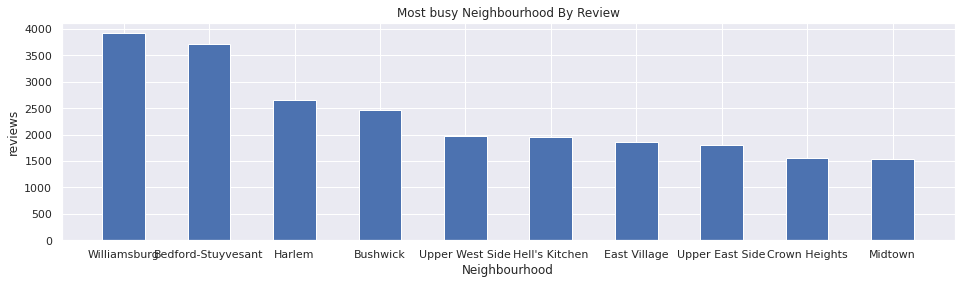

In [ ]:
Neighbourhood = Busiest_neighbourhood['neighbourhood']
reviews =Busiest_neighbourhood['number_of_reviews']
fig = plt.figure(figsize = (16,4)) 
plt.bar(Neighbourhood,reviews,width=0.5)
plt.xlabel('Neighbourhood')
plt.ylabel('reviews')
plt.title('Most busy Neighbourhood By Review')
plt.show()

#**What is costliest stay and in which neighbourhood group?**

In [ ]:
#costliest_stay
costliest_stay = airbnb_df.groupby(['host_name','neighbourhood_group', 'neighbourhood','room_type','minimum_nights' ])['price'].max().reset_index()
costliest_stays = costliest_stay.sort_values(by='price',ascending=False).head(10)
costliest_stays

,host_name,neighbourhood_group,neighbourhood,room_type,minimum_nights,price
20087,Kathrine,Queens,Astoria,Private room,100,10000
11864,Erin,Brooklyn,Greenpoint,Entire home/apt,5,10000
16800,Jelena,Manhattan,Upper West Side,Entire home/apt,30,10000
25238,Matt,Manhattan,Lower East Side,Entire home/apt,30,9999
2217,Amy,Manhattan,Lower East Side,Private room,99,9999
29067,Olson,Manhattan,East Harlem,Entire home/apt,5,9999
32045,Rum,Manhattan,Tribeca,Entire home/apt,30,8500
17341,Jessica,Brooklyn,Clinton Hill,Entire home/apt,1,8000
32415,Sally,Manhattan,Upper East Side,Entire home/apt,1,7703
15538,Jack,Manhattan,Battery Park City,Entire home/apt,1,7500


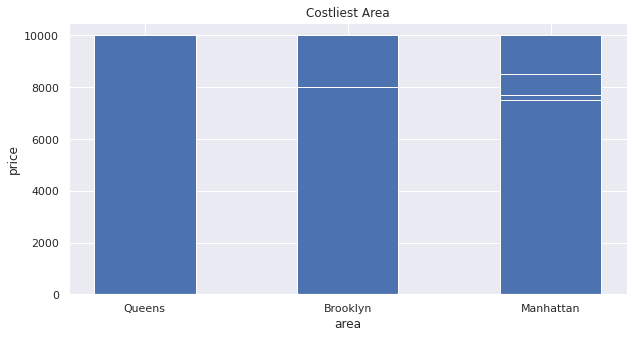

In [ ]:
#graph for costliest stay
area = costliest_stays['neighbourhood_group']
price = costliest_stays['price']
fig = plt.figure(figsize= (10,5))

plt.bar(area , price , width = 0.5)
plt.xlabel('area')
plt.ylabel('price')
plt.title('Costliest Area')
plt.show()

**The Airbnb data set host Katherine has the costliest stay in Manhattan for a private room for $10000 for 100 nights.**

#**Which is most preffered room type by customers?**

In [ ]:
#roomtypes_preferred_by_customers
room_types = airbnb_df.room_type.value_counts().reset_index()
room_types

,index,room_type
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


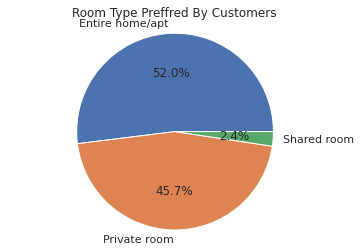

In [ ]:
Room_Lables = room_types['index']
room_data = room_types['room_type']

plt.pie(room_data , labels=Room_Lables, autopct='%1.1f%%')
plt.title('Room Type Preffred By Customers')
plt.axis('equal')
plt.show()

**There are 3 types of rooms Entire Home/apt, Private Room, and Shared room. But the Entire home/apt is the most preferred room type by customers rather than sharing a room. We can assume that from here customer chose the entire property rather than sharing a room with another person.**

#**How many properties listed on the Airbnb in which neighborhood group?**

In [ ]:
#diffrent room types available in diffrent neighbourhood group
room_type_avg_price = airbnb_df.groupby(['neighbourhood_group'])['room_type'].count().reset_index()
room_type_avg_price.sort_values(by= 'room_type',ascending=False)

,neighbourhood_group,room_type
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


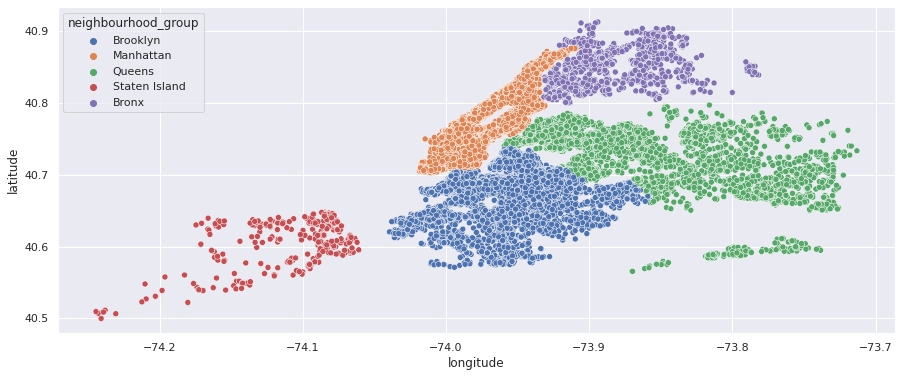

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=airbnb_df['longitude'],y=airbnb_df['latitude'], hue=airbnb_df['neighbourhood_group'])
plt.show()

**As we can see Manhattan has the most listed properties on Airbnb. There are 21,661 properties listed in Manhattan followed by Brooklyn has 20,104 rooms. The lowest property listed on Airbnb is the Staten Island, neighborhood_group. In this nieghbourhood_group Staten Island has only 373 properties are listed**


**We should see how many different types of rooms are of those in the listed properties.**

#**How many different types of rooms are listed on airbanb in neighbourhood_group?**

In [ ]:
room_type_available_area = airbnb_df.groupby(['neighbourhood_group','room_type'])['room_type'].count()
room_type_available_area

neighbourhood_group  room_type      
Bronx                Entire home/apt      379
                     Private room         652
                     Shared room           60
Brooklyn             Entire home/apt     9559
                     Private room       10132
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Entire home/apt     2096
                     Private room        3372
                     Shared room          198
Staten Island        Entire home/apt      176
                     Private room         188
                     Shared room            9
Name: room_type, dtype: int64

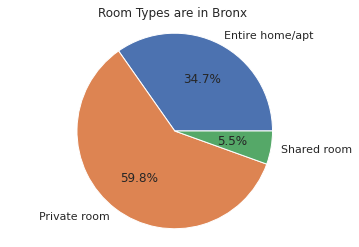

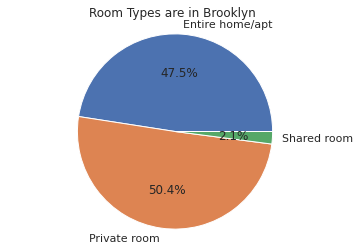

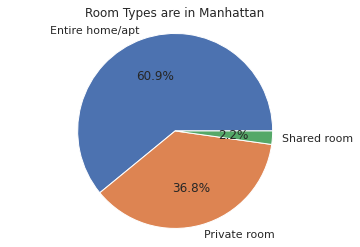

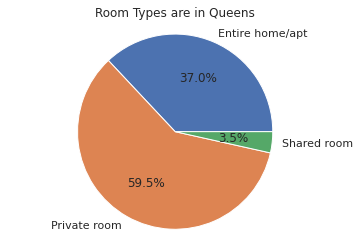

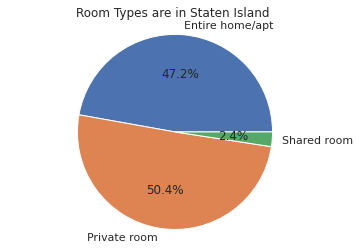

In [ ]:
#Graph Room Types are available in different Area')
#Bronx
Room_Lables = room_type_available_area.Bronx.index
room_data = room_type_available_area.Bronx.values

plt.pie(room_data , labels= Room_Lables, autopct='%1.1f%%')
plt.title('Room Types are in Bronx ')
plt.axis('equal')
plt.show()

#Brooklyn
Room_Lables = room_type_available_area.Brooklyn.index
room_data = room_type_available_area.Brooklyn.values

plt.pie(room_data , labels= Room_Lables, autopct='%1.1f%%')
plt.title('Room Types are in Brooklyn ')
plt.axis('equal')
plt.show()

#Manhattan
Room_Lables = room_type_available_area.Manhattan.index
room_data = room_type_available_area.Manhattan.values

plt.pie(room_data , labels= Room_Lables, autopct='%1.1f%%')
plt.title('Room Types are in Manhattan')
plt.axis('equal')
plt.show()

#Queens
Room_Lables = room_type_available_area.Queens.index
room_data = room_type_available_area.Queens.values

plt.pie(room_data , labels= Room_Lables, autopct='%1.1f%%')
plt.title('Room Types are in Queens')
plt.axis('equal')
plt.show()


#Staten Island
Room_Lables = room_type_available_area['Staten Island'].index
room_data = room_type_available_area['Staten Island'].values

plt.pie(room_data , labels= Room_Lables, autopct='%1.1f%%')
plt.title('Room Types are in Staten Island ')
plt.axis('equal')
plt.show()

**The most of properties in different neighbourhood_group are Private Room but in the Manhattan neighbourhood_group Entire home/apt properties are mostly listed on the Airbnb.**

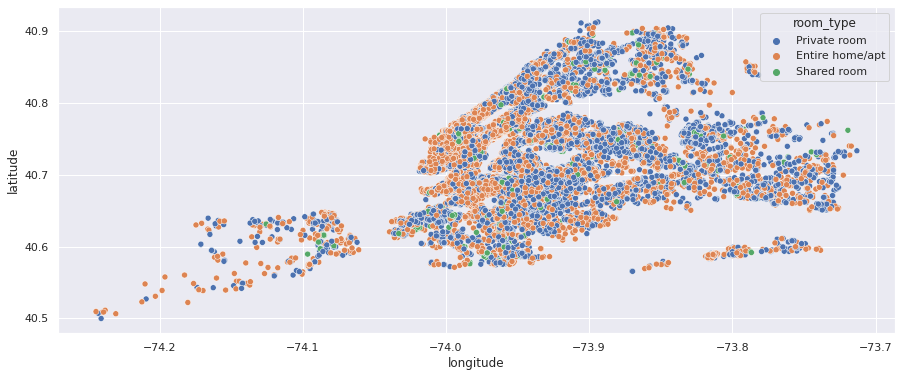

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=airbnb_df['longitude'],y=airbnb_df['latitude'], hue=airbnb_df['room_type'])
plt.show()

**With the help of the longitude and latitude, we can see where these properties are situated, and also different types of room types are listed in which neighborhood**

#**What are the maximum, mean, and median prices of different types of rooms?**

In [ ]:
airbnb_df.groupby('room_type').agg({'price':['count','max','min','median','mean']}).reset_index()

room_type  price                              
                    count    max min median        mean
0  Entire home/apt  25409  10000  10  160.0  211.806840
1     Private room  22326  10000  10   70.0   89.802920
2      Shared room   1160   1800  10   45.0   70.205172

**We can see in the above chart maximum price of Entire home/apt,Private Room and Shared Room for $10000 10000 1800 respectively.**

#**What is average price of different rooms?**

In [ ]:
room_type_avg_price = airbnb_df.groupby(['room_type'])['price'].mean().reset_index()
room_type_avg_price

,room_type,price
0,Entire home/apt,211.806840
1,Private room,89.802920
2,Shared room,70.205172


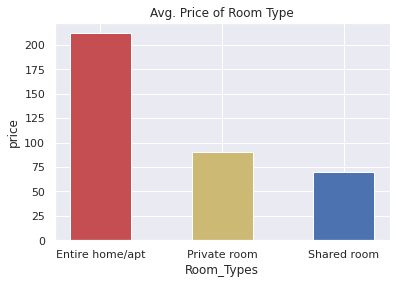

In [ ]:
Room_Types = room_type_avg_price['room_type']
avg_price = room_type_avg_price['price']
c = ('r','y','b')
plt.bar(Room_Types ,avg_price, color =c, width = 0.5)
plt.xlabel('Room_Types')
plt.ylabel('price')
plt.title('Avg. Price of Room Type')
plt.show()

**The Airbnb data set have different priceing for different room types Entire home/apt Private Room costs highly compared to a shared room. The pricing of these property types changes according to where these properties are in the area. The average price for an Entire Home/Apt is 211 for a private room is 83.72 and for a shared room is 70.12.**

#**What are the average price in different neighbourhood group?**

In [ ]:
#avg. price for neighbourhood group
neighbourhood_group_avg = airbnb_df.groupby(['neighbourhood_group'])['price'].mean().sort_values(ascending=False).reset_index()
neighbourhood_group_avg

,neighbourhood_group,price
0,Manhattan,196.883200
1,Brooklyn,124.416534
2,Staten Island,114.812332
3,Queens,99.517649
4,Bronx,87.560953


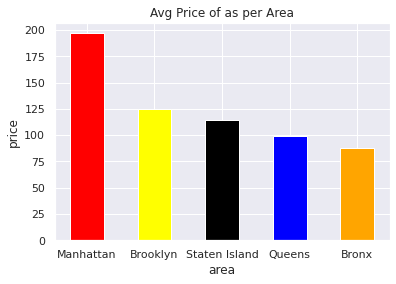

In [ ]:
#Graph for neighbourhood group avg price
neighbourhood_group_avg_index = neighbourhood_group_avg['neighbourhood_group']
neighbourhood_group_avg_values = neighbourhood_group_avg['price']
c = ('red','yellow','black','blue','orange')
plt.bar(neighbourhood_group_avg_index , neighbourhood_group_avg_values , color =c, width = 0.5)
plt.xlabel('area')
plt.ylabel('price')
plt.title('Avg Price of as per Area')
plt.show()

**On Airbnb Manhattan, neighbourhood_group is the costliest for stay compared to other neighbourhood_groups, followed by Brooklyn having higher average pricing. Bronx neighbourood_group has the lowest Average pricing compared to other neighbourhood_group.**

#**What are the maximum, mean, and median prices available for different neighborhood group?**

In [ ]:
#maximum price of airbnb in different neighbourhood
airbnb_df.groupby('neighbourhood_group').agg({'price':['count','max','median','mean']}).reset_index()

neighbourhood_group  price                          
                       count    max median        mean
0               Bronx   1091   2500   65.0   87.560953
1            Brooklyn  20104  10000   90.0  124.416534
2           Manhattan  21661  10000  150.0  196.883200
3              Queens   5666  10000   75.0   99.517649
4       Staten Island    373   5000   75.0  114.812332

**This chart explains different types of prices in neighbourhood_group like maximum price median price and mean prices. In this chart we can see Manhattan neighborhood group has the most expensive compared to other neighborhood groups, the average price in Manhattan is 196.88$.**

#**What are the average prices according to the neighborhood?**

In [ ]:
avg_price_of_neighbourhood= airbnb_df.groupby(['neighbourhood'])['price'].mean().reset_index().sort_values(by='price').tail(20)
avg_price_of_neighbourhood

,neighbourhood,price
73,Financial District,225.490591
145,Nolita,230.138340
191,Theater District,248.013889
215,Willowbrook,249.000000
34,Chelsea,249.738544
92,Greenwich Village,263.405612
209,West Village,267.682292
139,Neponsit,274.666667
127,Midtown,282.719094
178,SoHo,287.103352


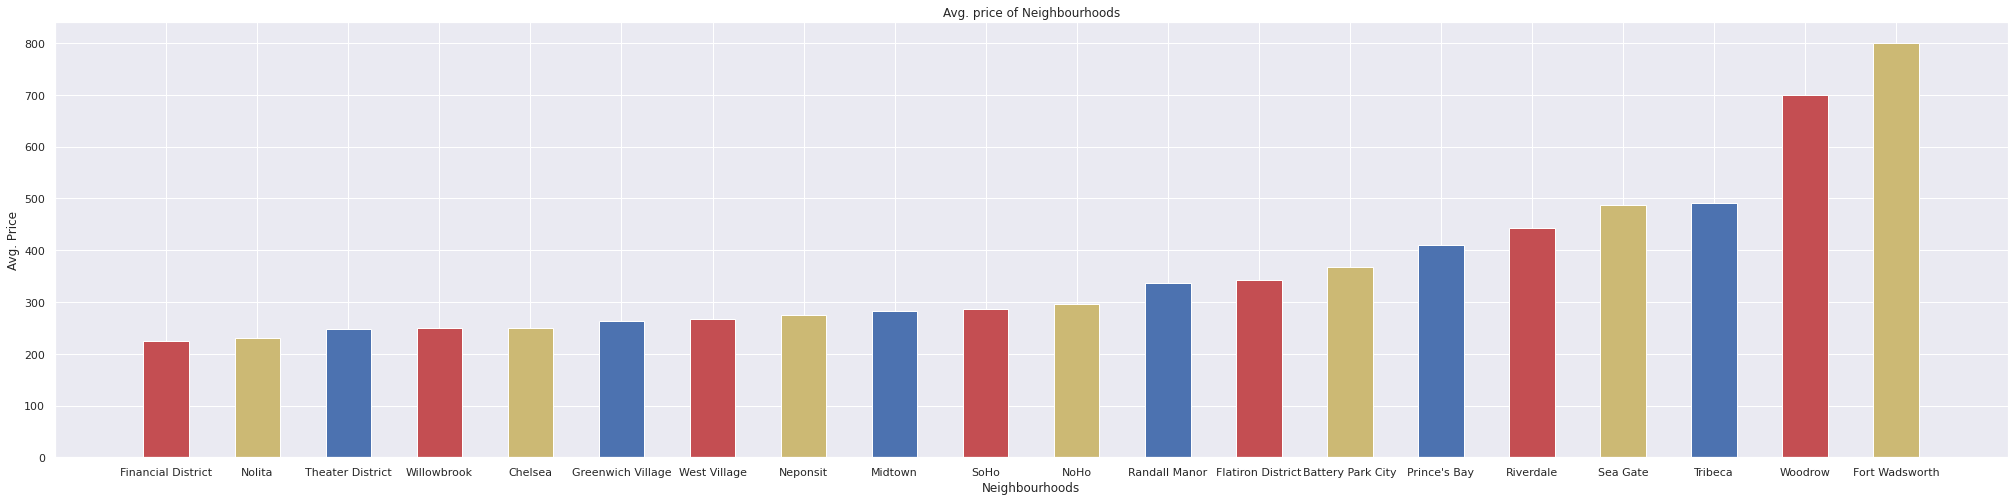

In [ ]:
area = avg_price_of_neighbourhood['neighbourhood']
price = avg_price_of_neighbourhood['price']
c = ('r','y','b')
fig = plt.figure(figsize= (35,8))

plt.bar(area , price , color = c, width = 0.5)
plt.xlabel('Neighbourhoods')
plt.ylabel('Avg. Price')
plt.title('Avg. price of Neighbourhoods')
plt.show()

**Neighbourhood prices depended upon this neighborhood's popular landmarks like Music theater, museum, clubs, etc.**

**On the Airbnb data set neighborhood of Fort Wadsworth has a maximum average price for a rental room.**

#**What is the average price of room types in neighbourhood group?**

In [ ]:
#Avg. price of room type in diffrent neighbourhood group
neigbourhood_group_room_type_avg_price = airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
neigbourhood_group_room_type_avg_price

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.895706
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.344283
4,Brooklyn,Private room,76.541552
5,Brooklyn,Shared room,50.745763
6,Manhattan,Entire home/apt,249.251231
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


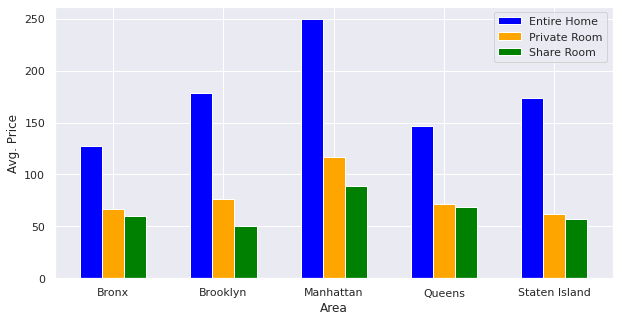

In [ ]:
x = np.arange(5)
Area= neigbourhood_group_room_type_avg_price['neighbourhood_group'][:13:3]
y1 =neigbourhood_group_room_type_avg_price['price'][0:13:3]
y2 =neigbourhood_group_room_type_avg_price['price'][1:14:3]
y3 = neigbourhood_group_room_type_avg_price['price'][2:15:3]
width = 0.2
figsize = plt.figure(figsize= (10,5))
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='blue')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x,Area)
plt.xlabel("Area")
plt.ylabel("Avg. Price")
plt.legend(["Entire Home", "Private Room", "Share Room"])
plt.show()

**From the above bar chart, we differentiate the average prices of room types in different neighborhood groups. Manhattan has maximum average prices compared to other neighbourhood_group.**

#**Which properties are inactive in the data?**

In [ ]:
inactive_peoperty = airbnb_df.groupby(['host_id','host_name','last_review','neighbourhood_group','room_type'])['neighbourhood'].count().reset_index()
inactive_peoperty.sort_values(by='last_review').head(5)

,host_id,host_name,last_review,neighbourhood_group,room_type,neighbourhood
1339,394752,Allison,2011-03-28,Brooklyn,Private room,1
659,171851,Henry,2011-04-25,Brooklyn,Private room,1
1393,417504,The Box House Hotel,2011-05-12,Brooklyn,Private room,1
8915,6197784,Jo,2011-09-18,Brooklyn,Private room,1
562,140025,Fredah,2011-09-19,Queens,Private room,1


**From the above chart, we can see that these rental properties from the Airbnb data set are inactive for a very long time. We decided through this properties don't have a review for a very long time.**

#**Who stayed for maximum nights for a very long time?**

In [ ]:
maxmium_stay = airbnb_df.groupby(['name','host_name','room_type'])['minimum_nights'].max().reset_index()
maxmium_stay.sort_values(by='minimum_nights', ascending=False).head(10)

,name,host_name,room_type,minimum_nights
32869,Prime W. Village location 1 bdrm,Genevieve,Entire home/apt,1250
3413,Absent,Peter,Entire home/apt,1000
37866,Shared Studio (females only),Meg,Shared room,999
6787,Beautiful place in Brooklyn! #2,Angie,Private room,999
22584,Historic Designer 2 Bed. Apartment,Glenn H.,Entire home/apt,999
32210,Peaceful apartment close to F/G,Amanda,Private room,500
47114,Wonderful Large 1 bedroom,John,Entire home/apt,500
46840,Williamsburg Apartment,Meg,Entire home/apt,500
47526,Zen Room in Crown Heights Brooklyn,Laura,Private room,500
5979,Beautiful Fully Furnished 1 bed/bth,Aliya,Entire home/apt,500


**On Airbnb some so many customers stayed for a very long time. Some customers who choose Entire homes/apt properties stayed for a long time. Highest one who stayed for 1250 nights on whole the Airbnb data set.**

#**Conclusion:**

**Manhattan is the most preferred neighbourhood_group by customer**

**Manhattan has the most number of properties listed, followed by Brooklyn and
Queens.**

**Manhattan and Brooklyn make up 87% of listings available in NYC.**

**Manhattan is the top neighbourhood_group in terms of listing as well as
highest average price.**

**Top 10 neighborhoods with the most listing are located either in Manhattan or
Brooklyn.**

**Sonder (NYC) host is having the most number of listings on Airbnb in NYC.**

**Williamsburg neighborhood has the most listing.
Most of the properties listed on Airbnb are Entire homes/apt and Private rooms.**

**The people who prefer to stay in the Entire home/apt are like going to stay longer,
Whereas customer who prefers to stay in at private room want to stay for short 
period time than the Entire home/apt.**

**Upper West Side, Astoria neighborhood have costliest stay in NYC.**

**Given that Manhattan is world-famous for its museums, stores, parks, and 
theatres it makes perfect sense that prices are higher in this neighborhood 
group.** 

**Williamsburg and Bedford Stuyvesant two neighbourhoods strategically close 
to Manhattan , customers get that chance to enjoy both equally while 
spend less money.**

**2019 June last two weeks to 2019 July First two weeks are the busiest days for 
Airbnb, whereas 2019-06-23 has the most number of the booking.**

**Many rows of the price columns and availability_365 are 0, Airbnb should 
solve this type of error.**

**The availability of rooms in Queens Island is high and lowest in Brooklyn,
So it is a chance to increase some properties in Brooklyn.**